In [ ]:
import pandas as pd
import nltk
import tensorflow as tf
import string
import re
import numpy as np
from scipy import linalg
from collections import defaultdict

In [32]:
df=pd.read_excel("azeri_news.xlsx")

In [33]:
corpus=[]
for sentence in df.News_Article:
    corpus.append(sentence)

In [150]:
corpus[0]

'Naviforce Sport Saat 2016 Yapon Mexanizmi Yapon batareykasi Deri Kəmər 1 İL zəmanət Pasport Qutu Su Keçirmir 3 ATM İNDİ SİFARİŞ ET ƏLAQƏ ÜÇÜN 055 239 54 49 BURADAN SİFARİŞ ET var SC_CId = "150627",SC_Domain="n.ads3-adnow.com";SC_Start_150627=(new Date).getTime(); Sağlamlıq \xa0 '

## Corpus cleaning

In [34]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
#corpus[0] = re.sub(r'https?://[^\s\n\r]+', '', corpus[0])

In [44]:
clean_corpus=[re.sub(r'https?://[^\s\n\r]+', '', corpus_i) for corpus_i in corpus] 
clean_corpus=[re.sub(r'[!"#$%&\'()*+,-./:;<=>?@^_`{|}~]+', '', corpus_i)for corpus_i in clean_corpus]#necessary

In [45]:
tokens_for_vec=[nltk.word_tokenize(corpus_i.lower()) for corpus_i in clean_corpus ]#necessary

In [46]:
final_corpus = " ".join(clean_corpus)
final_corpus=final_corpus.lower()

In [47]:
tokens = nltk.word_tokenize(final_corpus)

In [48]:
tokens=[word for word in tokens if word.isalpha()]# necessary

In [49]:
clean_tokens=[]
for word in tokens:
    if word not in [string.punctuation]:
        clean_tokens.append(word)

In [41]:
data=[]
for document in tokens:
    for word in document:
        data.append(word)
        

In [171]:
len(clean_tokens)

6885770

## Ngrams and frequency

In [93]:
from nltk.util import ngrams
from collections import Counter


# create bigrams
trigrams=ngrams(clean_tokens,3)
bigrams = ngrams(clean_tokens, 2)
unigrams=ngrams(clean_tokens, 1)

# count the frequency of each bigram
trigrams_freq=Counter(trigrams)
bigram_freq = Counter(bigrams)
unigram_freq=Counter(unigrams)


In [51]:
sorted_counter3 = sorted(trigrams_freq.items(), key=lambda x: x[1], reverse=True)
for i in sorted_counter3[:10]:
    print(i)

(('xəbər', 'verir', 'ki'), 17718)
(('qeyd', 'edək', 'ki'), 10680)
(('istinadən', 'xəbər', 'verir'), 10455)
(('istinadən', 'bildirir', 'ki'), 4995)
(('digər', 'maraqlı', 'xəbərlər'), 3927)
(('maraqlı', 'xəbərlər', 'milliazın'), 3927)
(('xəbərlər', 'milliazın', 'facebook'), 3925)
(('milliazın', 'facebook', 'səhifəsində'), 3909)
(('milliaz', 'digər', 'maraqlı'), 3619)
(('verir', 'ki', 'bu'), 3491)


In [52]:
sorted_counter = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)
for i in sorted_counter[:10]:
    print(i)

(('xəbər', 'verir'), 18749)
(('verir', 'ki'), 18244)
(('edək', 'ki'), 11326)
(('ki', 'bu'), 10712)
(('qeyd', 'edək'), 10704)
(('istinadən', 'xəbər'), 10588)
(('ilə', 'bağlı'), 8420)
(('bu', 'gün'), 7619)
(('bu', 'barədə'), 7446)
(('məlumata', 'görə'), 7288)


In [94]:
uni_sorted_counter = sorted(unigram_freq.items(), key=lambda x: x[1], reverse=True)
for i in uni_sorted_counter[:10]:
    print(i)

(('və',), 150928)
(('ki',), 102428)
(('bu',), 88902)
(('ilə',), 59937)
(('bir',), 47006)
(('də',), 40955)
(('üçün',), 37691)
(('görə',), 35133)
(('azərbaycan',), 32703)
(('da',), 31742)


In [140]:
words=[ i[0][0] for i in uni_sorted_counter]
freqs=[ i[1] for i in uni_sorted_counter]

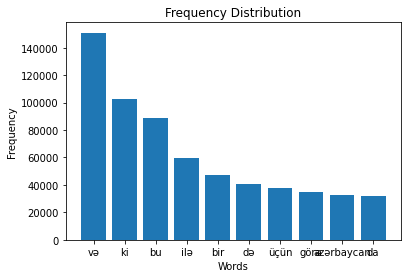

In [144]:
import matplotlib.pyplot as plt
plt.bar(words[:10], freqs[:10])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequency Distribution")
plt.show()

## Co-occurence matrix

In [145]:
unique_words = set(clean_tokens)

In [146]:
word_to_index = {word: i for i, word in enumerate(unique_words)}

In [156]:
matrix = np.zeros((len(unique_words), len(unique_words)))

window_size = 3
for i, word in enumerate(clean_tokens):
    for j in range(max(0, i-window_size), min(len(clean_tokens), i+window_size+1)):
        if j != i:
            matrix[word_to_index[word]][word_to_index[clean_tokens[j]]] += 1


In [169]:
matrix[word_to_index['saat']][word_to_index['yapon']]

10.0

## Word2Vec

In [54]:
from gensim.models import Word2Vec

In [55]:
#model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)
#model.build_vocab(clean_tokens, progress_per=10000,)
#model.train(clean_tokens, total_examples=model.corpus_count, epochs=30, report_delay=1)
# Save the trained model to a file
#model.save("word2vec_model.bin")

In [57]:
#CBOW model
model = Word2Vec(tokens_for_vec,vector_size=100, window=5, min_count=1, workers=4)

In [164]:
model.wv.most_similar("saat")

[('axşam', 0.7521540522575378),
 ('səhər', 0.7035852670669556),
 ('günorta', 0.6948028206825256),
 ('saatlarından', 0.6396806240081787),
 ('gecə', 0.6356819272041321),
 ('radələrində', 0.635267436504364),
 ('lbəyim', 0.6308557391166687),
 ('saatlıq', 0.6229872703552246),
 ('vaxtla', 0.6124105453491211),
 ('dəqiqə', 0.6109160780906677)]

In [170]:
model.wv.similarity("məktəb", 'kitab'),model.wv.similarity("məktəb", 'futbol')

(0.35976398, 0.06253983)

In [81]:
#model.wv.cosine_similarities( np.expand_dims(model.wv["kitab"],axis=1),np.expand_dims(model.wv["məktəb"],axis=0))

array([[0.35976398]], dtype=float32)

In [1]:
#model = Word2Vec.load("word2vec_model.bin")
#vocab=model.build_vocab(tokens)
# Calculate the semantic similarity between two words
#similarity = model.wv.cosine_similarities()

In [84]:
#SkipGram
model2 = Word2Vec(tokens_for_vec,vector_size=100, window=5, min_count=1, workers=4,sg = 2)

In [162]:
model2.wv.most_similar("azərbaycan")

[('azərbaycanın', 0.760952353477478),
 ('respublikası', 0.7412906289100647),
 ('respublikasının', 0.735689103603363),
 ('ölkəmizin', 0.7249079942703247),
 ('ölkəmiz', 0.6953458786010742),
 ('azərbaycanda', 0.6839665770530701),
 ('azəbaycan', 0.6767650842666626),
 ('türkmənistan', 0.6754035353660583),
 ('ölkəmizdə', 0.6738168001174927),
 ('gürcüstan', 0.6686011552810669)]